In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import pyARCiS

In [2]:
# initialize ARCiS from input file input.dat, store output in <output>
# the third argument with commandline options is optional
pyARCiS.pyinit('input.dat','output','-s emisspec=.true. -s computeT=.true.')

Output dir: output/
         ARtful modelling code for exoplanet Science - ARCiS
By using ARCiS you agree to the terms of use.
It basically means you offer us co-author rights on any paper
that uses results computed with ARCiS.
Let's get the show on the road!!
ARCiS version 9a217aea4ae9f380b80a9510d03bafc52217c0ff
input file: input.dat
Command line argument: emisspec=.true.
Command line argument: computeT=.true.
Number of molecules:          4                
Number of clouds:             0                
Number of collision pairs:    2                
Number of observations:       0                
Planet logg:    3.414            
Reading in correlated k-tables for H2O
   wavelength range: 3.00E-01 - 5.00E+01 micron
     pressure range: 1.00E-05 - 1.00E+02 bar
  temperature range: 1.00E+02 - 3.40E+03 K
Reading in correlated k-tables for CO2
   wavelength range: 3.00E-01 - 5.00E+01 micron
     pressure range: 1.00E-05 - 1.00E+02 bar
  temperature range: 1.00E+02 - 3.40E+03 K
Reading 

In [3]:
lam=np.empty([pyARCiS.pyex.nlam],dtype=float)
trans=np.empty([pyARCiS.pyex.nlam],dtype=float)
emis=np.empty([pyARCiS.pyex.nlam],dtype=float)
P=np.empty([pyARCiS.pyex.nr],dtype=float)
T=np.empty([pyARCiS.pyex.nr],dtype=float)

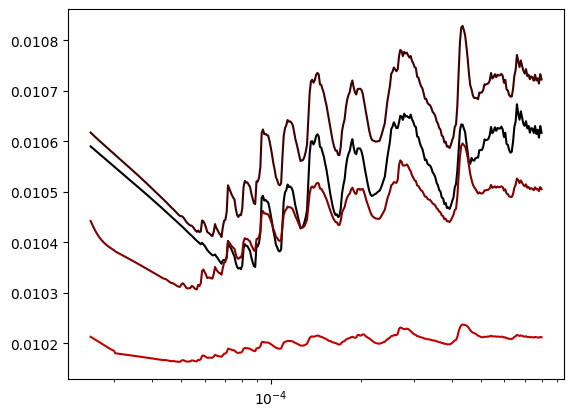

In [11]:
for i in range(0,4):
    Z=float(i)
# pysetvalue sets a keyword using a string and a float (key and value)
    pyARCiS.pysetvalue('metallicity',Z)
# pycomputemodel computes a model using the current setup
    pyARCiS.pycomputemodel()
    pyARCiS.pygettrans(lam,trans)
    plt.xscale('log')
    plt.plot(lam, trans, color=(i/4,0,0),zorder=200)

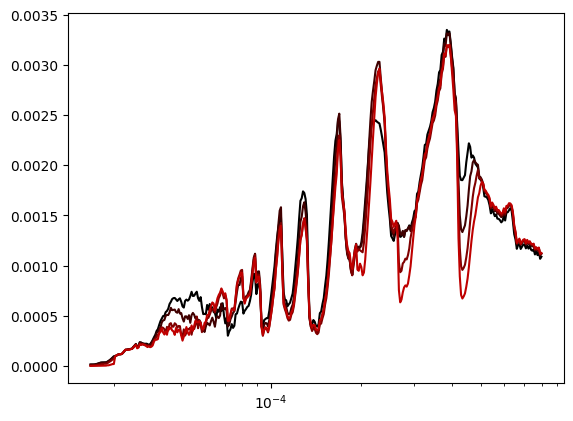

In [12]:
# pysetkeyword sets a keyword using two strings (key and value)
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# note that you always have to be carefull changing things after initialization. 
# For physical parameters (abundances, radius, mass, chemical parameters ...) it is always fine
# For retrieval parameters it is always fine
# For parameters defining the setup (number of layers, chemistry on/off, spectral resultion ...) 
#                                        it is usually NOT fine
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

pyARCiS.pysetkeyword('scattering','.true.')
pyARCiS.pysetkeyword('scattstar','.true.')

for i in range(0,4):
    Z=float(i)
    pyARCiS.pysetvalue('metallicity',Z)
    pyARCiS.pycomputemodel()
    pyARCiS.pygetemis(lam,emis,1)    
    plt.xscale('log')
    plt.plot(lam, emis, color=(i/4,0,0),zorder=200)


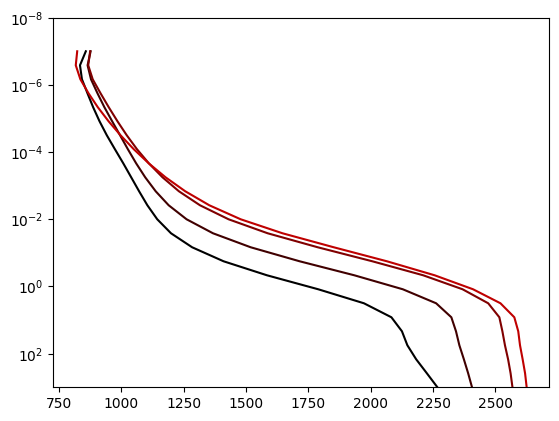

In [10]:
for i in range(0,4):
    Z=float(i)
    pyARCiS.pysetvalue('metallicity',Z)
    pyARCiS.pycomputemodel()
    pyARCiS.pygetpt(P,T)
    plt.plot(T,P, color=(i/4,0,0),zorder=200)
    plt.ylim(1000,1e-8)
    plt.yscale('log')